In [7]:
from warnings import warn

In [14]:
warn('ignore')

/tmp/ipykernel_9037/2046804602.py:1: UserWarning: ignore
  warn('ignore')


In [15]:
import tensorflow as tf

In [16]:
import keras

In [18]:
# version

print(f'tensorflow : {tf.__version__}')
print(f'Keras : {keras.__version__}')

tensorflow : 2.7.4
Keras : 2.7.0


In [19]:
fashion_mnist = keras.datasets.fashion_mnist

In [22]:
(X_train_full,y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
X_train_full.shape

(60000, 28, 28)

In [25]:
y_train_full.shape

(60000,)

In [26]:
X_test.shape

(10000, 28, 28)

In [27]:
y_test.shape

(10000,)

In [28]:
X_valid, x_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
class_names[y_train[0]]

'Coat'

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model = keras.models.Sequential([
(keras.layers.Flatten(input_shape=[28,28])),
(keras.layers.Dense(300, activation='relu')),
(keras.layers.Dense(100, activation='relu')),
(keras.layers.Dense(10, activation='softmax'))])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.layers

In [37]:
hidden1 = model.layers[1]

In [38]:
hidden1.name

'dense_3'

In [40]:
model.get_layer('dense_3') is hidden1

True

In [41]:
weights, biases = hidden1.get_weights()

In [42]:
weights

array([[-0.02762444,  0.01413549,  0.01061919, ..., -0.06058289,
        -0.00867137, -0.01566401],
       [-0.00268858,  0.00934059,  0.00037882, ..., -0.05690197,
         0.01191743, -0.01807651],
       [ 0.03080717,  0.02176905, -0.00329149, ..., -0.04755384,
        -0.02048928,  0.03162074],
       ...,
       [ 0.05705202,  0.038462  , -0.02681055, ..., -0.07006587,
        -0.02796077, -0.06764165],
       [ 0.04868115, -0.01104052, -0.04047913, ...,  0.05193679,
        -0.07410799,  0.02624055],
       [-0.04456086, -0.00057866,  0.02424266, ...,  0.03925806,
        -0.03545765, -0.04451737]], dtype=float32)

In [43]:
weights.shape

(784, 300)

In [44]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
biases.shape

(300,)

In [46]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [48]:
history = model.fit(x_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7285 - accuracy: 0.7588 - val_loss: 0.5031 - val_accuracy: 0.8342
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4931 - accuracy: 0.8283 - val_loss: 0.4757 - val_accuracy: 0.8308
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4475 - accuracy: 0.8424 - val_loss: 0.4446 - val_accuracy: 0.8424
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4190 - accuracy: 0.8528 - val_loss: 0.4046 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8607 - val_loss: 0.3777 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3811 - accuracy: 0.8663 - val_loss: 0.3690 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3671 - accuracy: 0.8702 - val_loss: 0.3750 - val_accuracy:

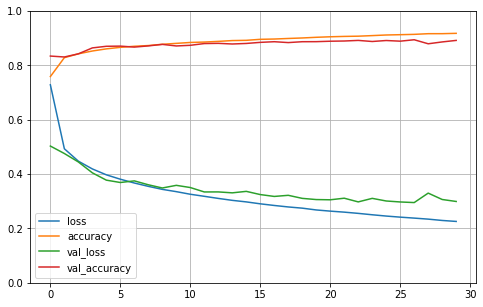

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 56.3041 - accuracy: 0.8613


[56.30409240722656, 0.861299991607666]

In [52]:
x_new = X_test[:3]

In [56]:
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
y_pred = model.predict_classes(x_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [58]:
model.

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca